In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Uploading Data from the local drive
from google.colab import files
uploaded = files.upload()

Saving AutomobileData.csv to AutomobileData.csv


In [4]:
# Import IO Module
import io
from io import StringIO


In [6]:
#Reading Data
df_cars = pd.read_csv(io.BytesIO(uploaded['AutomobileData.csv']))

In [7]:
df_cars.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10)
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5


In [8]:
#Statistical Summary
df_cars.describe()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10)
count,255,255,244,255,255,255,255
unique,255,31,202,5,15,250,31
top,Tata Nexon EV,SUV,16 Km/l,Automatic,Petrol,₹ 1 Cr,na
freq,1,27,5,169,127,3,68


In [9]:
#Checking data type
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Car              255 non-null    object
 1   Style            255 non-null    object
 2   Range            244 non-null    object
 3   Transmission     255 non-null    object
 4   VehicleType      255 non-null    object
 5   PriceRange       255 non-null    object
 6   Rating(outof10)  255 non-null    object
dtypes: object(7)
memory usage: 14.1+ KB


In [17]:
#checking for Null value
print ( "There are 11 null values in the Range field:",df_cars.isnull().sum())

There are 11 null values in the Range field: Car                 0
Style               0
Range              11
Transmission        0
VehicleType         0
PriceRange          0
Rating(outof10)     0
dtype: int64


In [19]:
#Checking for Model_wise records
df_cars["Style"].value_counts()

SUV                       27
Compact SUV               19
Premium Fullsize SUV      19
Premium Sports Coupe      15
Luxury SUV                15
Premium Midsize Sedan     13
Sports Car                12
Subcompact SUV            11
Premium Coupe             11
Premium Luxury Sedan      11
Entry Hatchback           10
Premium Midsize SUV        9
Premium Hatchback          8
Compact Sedan              7
Luxury Hatchback           7
Premium Sports Sedan       7
Premium Fullsize Sedan     7
Compact Hatchback          6
Supersports Car            6
Subcompact Sedan           5
Fullsize/Premium MPV       5
Subcompact MPV             4
Compact SUV/Crossover      4
Premium Compact SUV        3
Compact MPV                3
Performance Sedan          3
Midsize Sedan              2
Premium Compact Sedan      2
Fullsize Sedan             2
Midsize SUV                1
Quadricycle                1
Name: Style, dtype: int64

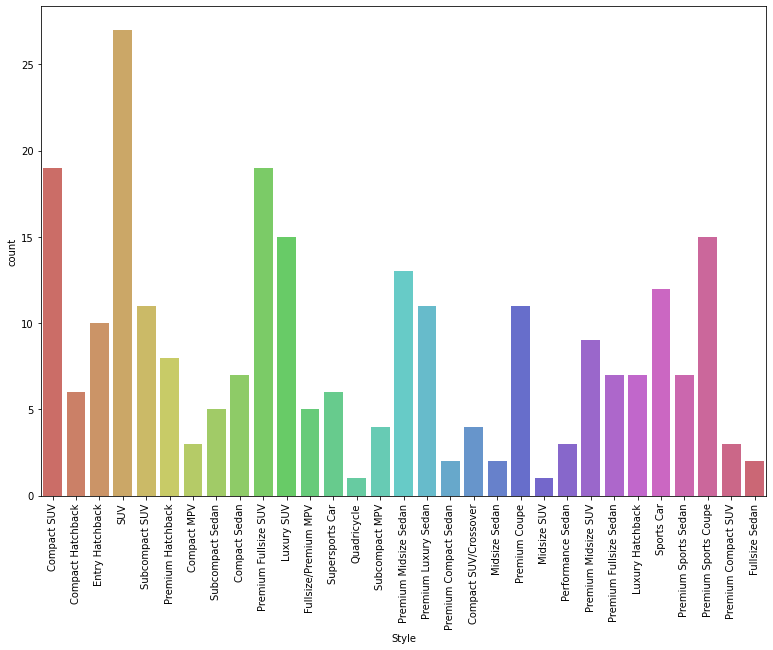

In [23]:
#Visualizing the Car_style data
plt.figure(figsize = (13, 9))
sns.countplot("Style", data = df_cars, palette = "hls")
plt.xticks(rotation = 90)
plt.show()

In [24]:
df_cars['Transmission'].value_counts()

Automatic               169
Automatic,Manual         45
AMT,Manual               19
Manual                   19
AMT,Automatic,Manual      3
Name: Transmission, dtype: int64

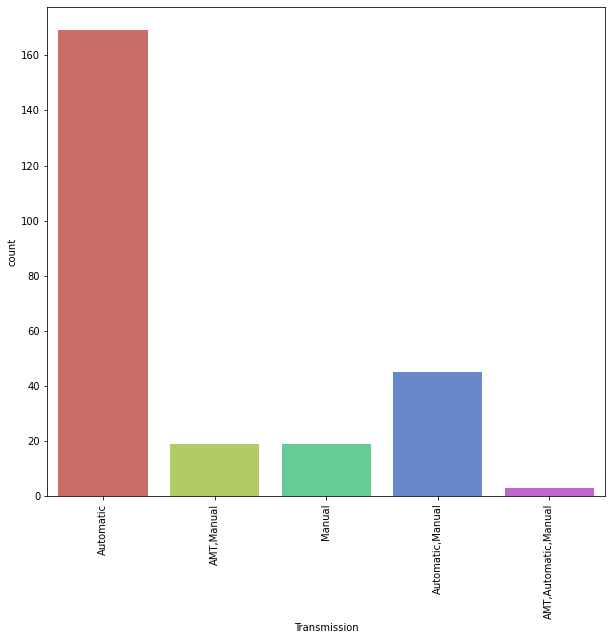

In [31]:
plt.figure(figsize = (10, 9))
sns.countplot("Transmission", data = df_cars, palette = "hls")
plt.xticks(rotation = 90)
plt.show()

In [26]:
#Checking vehicle type
df_cars["VehicleType"].value_counts()

Petrol                      127
Petrol,Diesel                46
Diesel                       28
Electric                     15
Petrol,Petrol+CNG            10
Diesel,Petrol                10
Hybrid                        8
Petrol,Petrol+CNG,Diesel      2
Petrol,Diesel,Hybrid          2
Petrol,Hybrid                 2
Diesel,Petrol+CNG             1
Petrol,Petrol+LPG             1
Diesel,Petrol,Hybrid          1
Hybrid,Petrol,Diesel          1
Diesel,Hybrid                 1
Name: VehicleType, dtype: int64

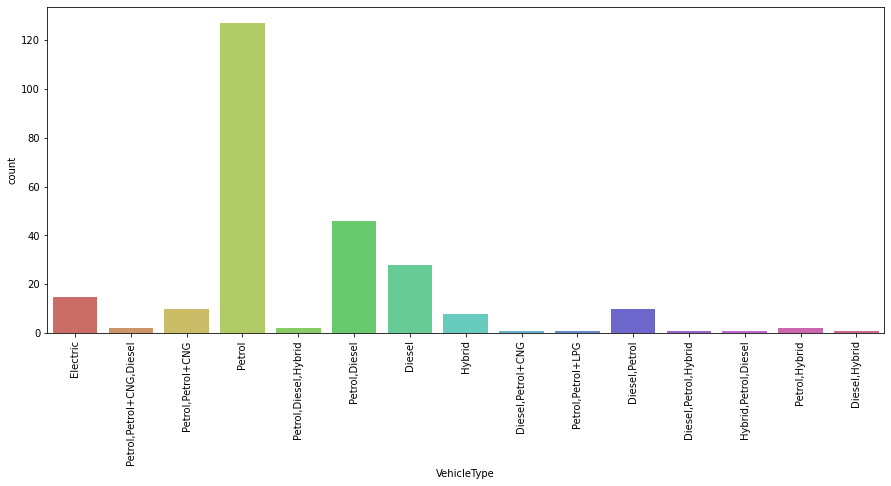

In [30]:
plt.figure(figsize = (15, 6))
sns.countplot("VehicleType", data = df_cars, palette = "hls" )
plt.xticks(rotation = 90)
plt.show()

In [34]:
#Checking Rating
df_cars["Rating(outof10)"].unique()
df_cars["Rating(outof10)"].value_counts()

na     68
8.2    16
8      14
7.9    14
7.7    14
7.6    13
8.1    13
7.8    12
7.5    10
8.3     9
8.4     9
7.3     8
8.5     6
7.1     5
8.7     5
7       5
8.8     4
6.6     3
6.4     3
6.5     3
8.6     3
7.4     3
7.2     2
9       2
5.5     2
6.9     2
6.8     2
6.1     2
5.4     1
5       1
6.3     1
Name: Rating(outof10), dtype: int64

In [40]:
#Replacing NA from the car rating
df_cars["Rating(outof10)"].replace("na", 5, inplace =True)

#Changing the data type
df_cars["Rating(outof10)"] = df_cars["Rating(outof10)"].astype(float)


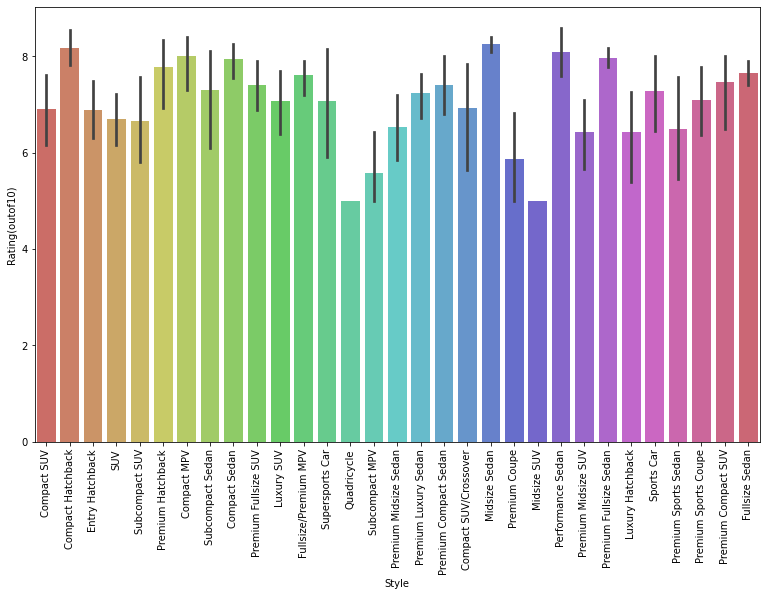

In [42]:
#Visulaizing the data by Boxplot
plt.figure(figsize = (13,8))
sns.barplot(x = "Style", y = "Rating(outof10)", data = df_cars,palette = "hls")
plt.xticks(rotation = 90)
plt.show()

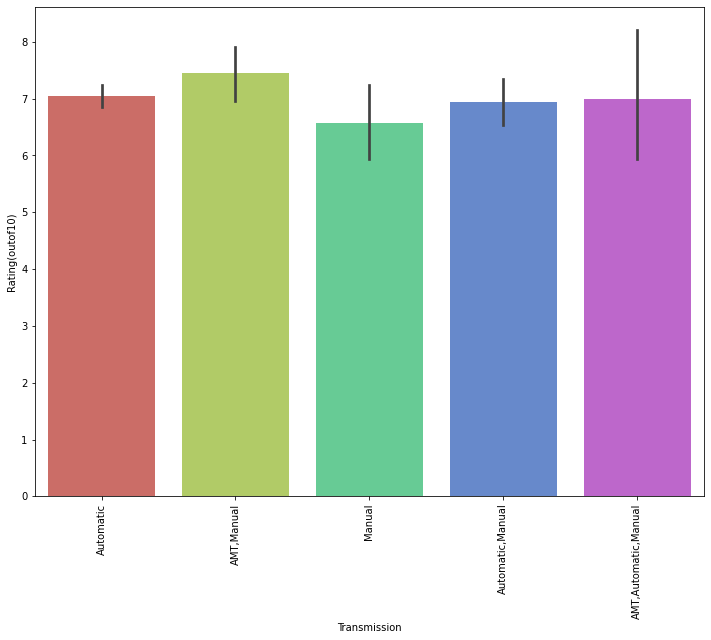

In [45]:
#Visualizing Transmission and Rating
plt.figure(figsize = (12, 9))
sns.barplot(x = "Transmission", y = "Rating(outof10)", data = df_cars, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

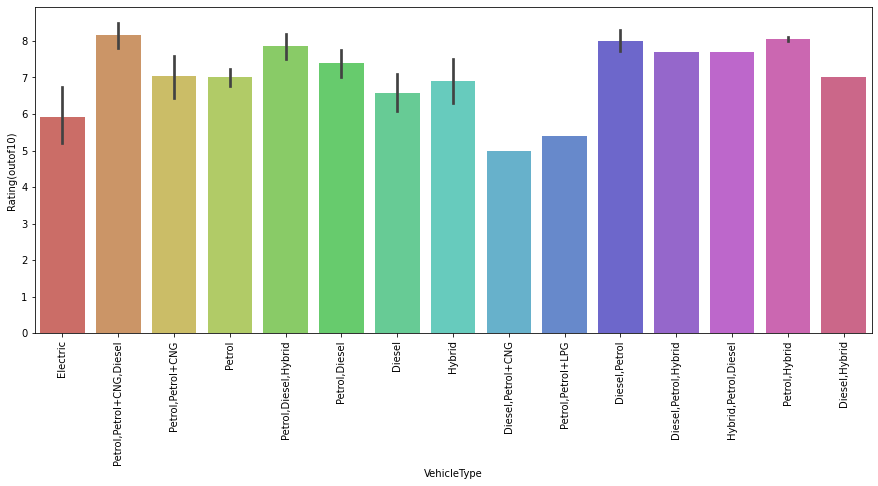

In [47]:
plt.figure(figsize = (15, 6))
sns.barplot(x = "VehicleType", y = "Rating(outof10)", data = df_cars, palette = "hls")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
---End of Analysis--